# KMeans Clustering Algorithm

## Algorithm steps

In [1]:
# input: 
#  N = number of data points
#  K = number of clusters

# Generate N random data points
# Generate K random centroids
#  Forgy method - randomly choose k data points to serve as initial centroids
# Repeat (until assignments stop changing):
#  Assignment step: Assign every data point to the closest centroid
#  Update step: Calculate new centroids

## Algorithm implementation 

### Setup, imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
import copy

# cluster colors
colors = ['r','b','y','g','k','c','m']

%matplotlib inline

### Helper functions

In [3]:
def generate_datapoints(num_datapoints):
    return np.random.randn(num_datapoints,2)


# dummy centroid initialization using randomly generated points
def initiate_centroids(num_clusters):
    return np.random.randn(num_clusters,2)

# initializing centroids using forgy method
# selects K random datapoints as initial centroids
def initiate_centroids_forgy(data, num_clusters):
    return data[np.random.choice(data.shape[0], num_clusters, replace=False), :]


# def find_closest_centroids(data, centroids):
def assign_clusters(data, centroids):
    num_datapoints = data.shape[0]
    num_clusters = centroids.shape[0]
    
    distances = np.zeros((num_datapoints,num_clusters))
    for pt in range(num_datapoints):
        for centr in range(num_clusters):
            distances[pt][centr] = (euclidean(data[pt], centroids[centr]))
    return np.argmin(distances, axis=1)


def calculate_centroids(data,clusters_assignment, num_clusters):
    new_centroids=np.zeros((num_clusters,2))
    for centr in range(num_clusters):
        data_in_cluster = data[clusters_assignment==centr]
        new_centroids[centr] = [data_in_cluster[:,0].mean(), data_in_cluster[:,1].mean()]
        
    return new_centroids


### Algorithm implementation

In [4]:
def KMeans(data, num_clusters):
    num_datapoints = data.shape[0]
    
    # count number of steps
    step = 0
    
    # dummy initialization
    assigned_cluster = np.zeros(num_datapoints)
    
    # flag to use for stop condition
    converges = True
    
    # Generate K random centroids
    centroids = initiate_centroids_forgy(data,num_clusters)

    # Repeat (until assignments stop changing):
    while(converges):
        step = step+1
        #  Assignment step: Assign every data point to the closest centroid
        previous_assigned_cluster = copy.deepcopy(assigned_cluster)
        assigned_cluster = assign_clusters(data, centroids)
    
        #  Update step: Calculate new centroids
        previous_centroids = copy.deepcopy(centroids)
        centroids = calculate_centroids(data,assigned_cluster, num_clusters)
        
        converges = ( not np.array_equal(previous_assigned_cluster,assigned_cluster)) or (not np.array_equal(previous_centroids,centroids))
    
    # plot result

    print(f"Steps: {step}")
    print(f"Found centroids: \n{centroids}")
    plt.figure(figsize=(10,10))
    for pt in range(num_datapoints):
        plt.scatter(data[pt][0], data[pt][1], s=25, c=colors[assigned_cluster[pt]])

    for centr in range(num_clusters):
        plt.scatter(centroids[centr][0], centroids[centr][1], s=250, marker = '*', c=colors[centr])


### Run the algorithm

Steps: 14
Found centroids: 
[[ 0.21952925  0.17078632]
 [ 1.59789878 -0.03027352]
 [ 0.66206004  1.36244823]
 [ 0.66857924 -1.39395269]
 [-1.77931546 -0.57081946]
 [-0.44884173 -0.95671629]
 [-0.9307938   0.80663251]]


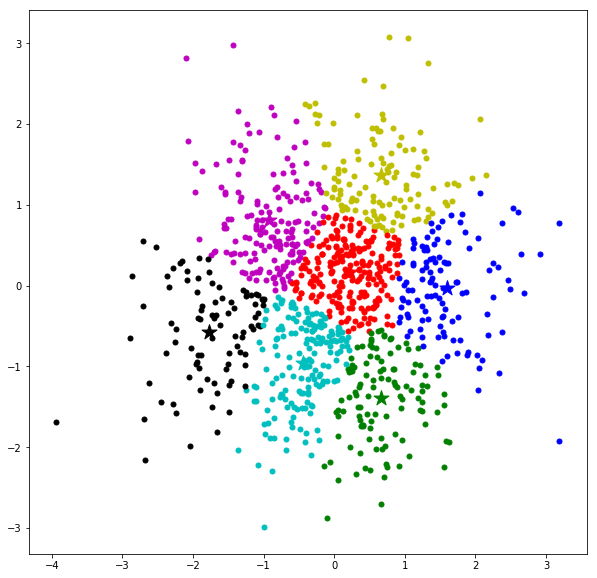

In [5]:
data = generate_datapoints(1000)

KMeans(data, 7)

### Beautifully clustered data

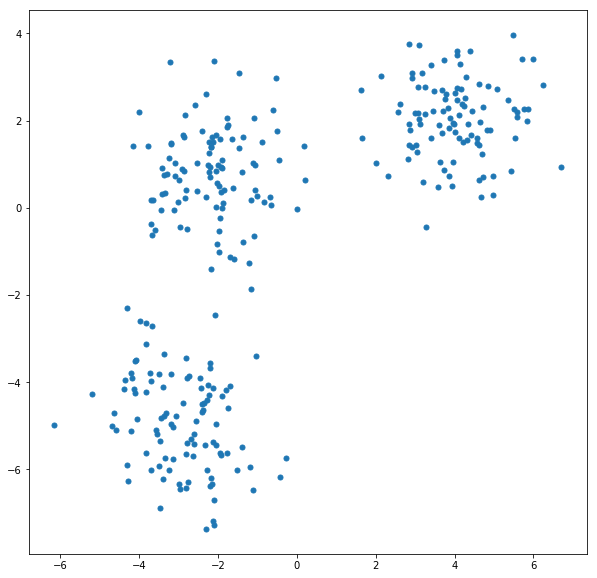

In [6]:
data_1 = generate_datapoints(100) + [4,2]
data_2 = generate_datapoints(100) + [-2,1]
data_3 = generate_datapoints(100) + [-3,-5]
beauty_data = np.concatenate((data_1, data_2, data_3), axis=0)

plt.figure(figsize=(10,10))
plt.scatter(beauty_data[:,0], beauty_data[:,1], s=25)

Steps: 3
Found centroids: 
[[-2.13775134  0.78489848]
 [ 4.0114556   2.04588999]
 [-2.94211475 -4.90486694]]


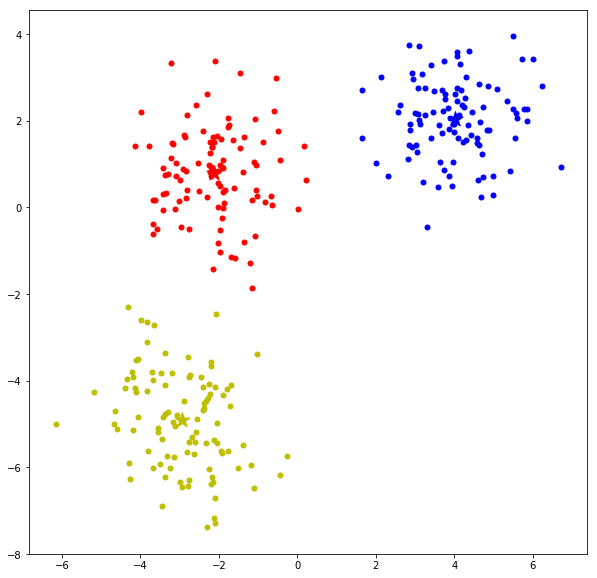

In [7]:
KMeans(beauty_data,3)